In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# importing dataset
df=pd.read_csv('/content/drive/MyDrive/winequalityN.csv')
dftypes=df.iloc[:,0]
df=df.drop(['type'],axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
df.shape

(6497, 12)

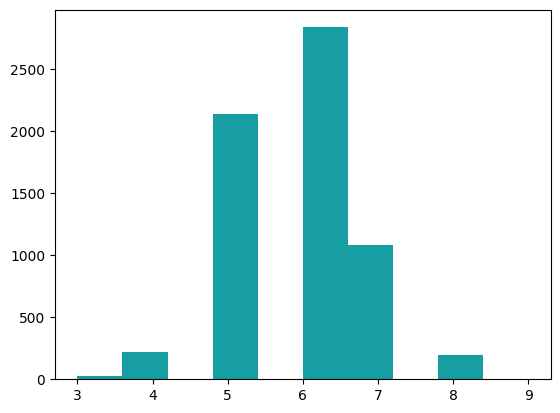

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [3]:
plt.hist(df['quality'],color='#179EA3')
plt.show()
df['quality'].value_counts()

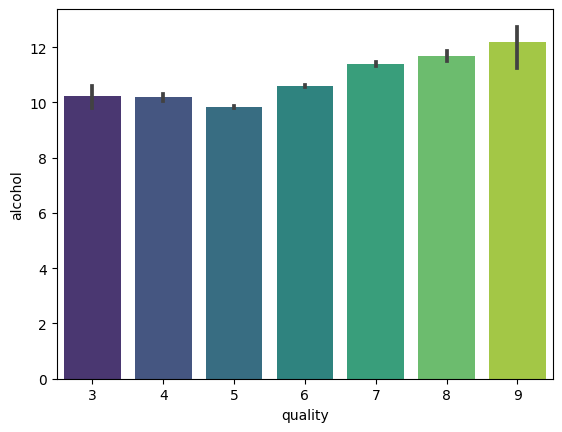

In [4]:
plt.figure()
sns.barplot(x=df['quality'],y=df['alcohol'],palette='viridis')
plt.show()

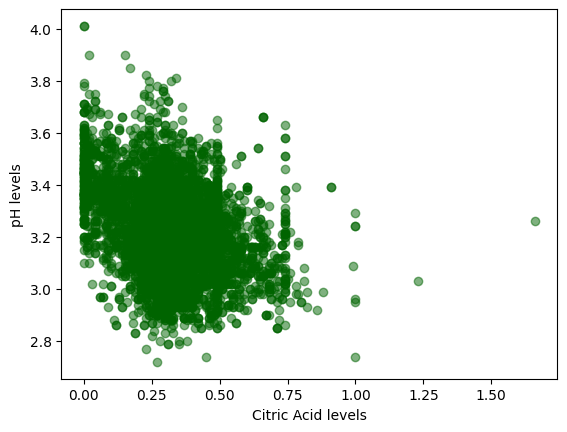

In [5]:
plt.scatter(x=df['citric acid'],y=df['pH'],color='darkgreen',alpha=0.5)
plt.xlabel('Citric Acid levels')
plt.ylabel('pH levels')
plt.show()

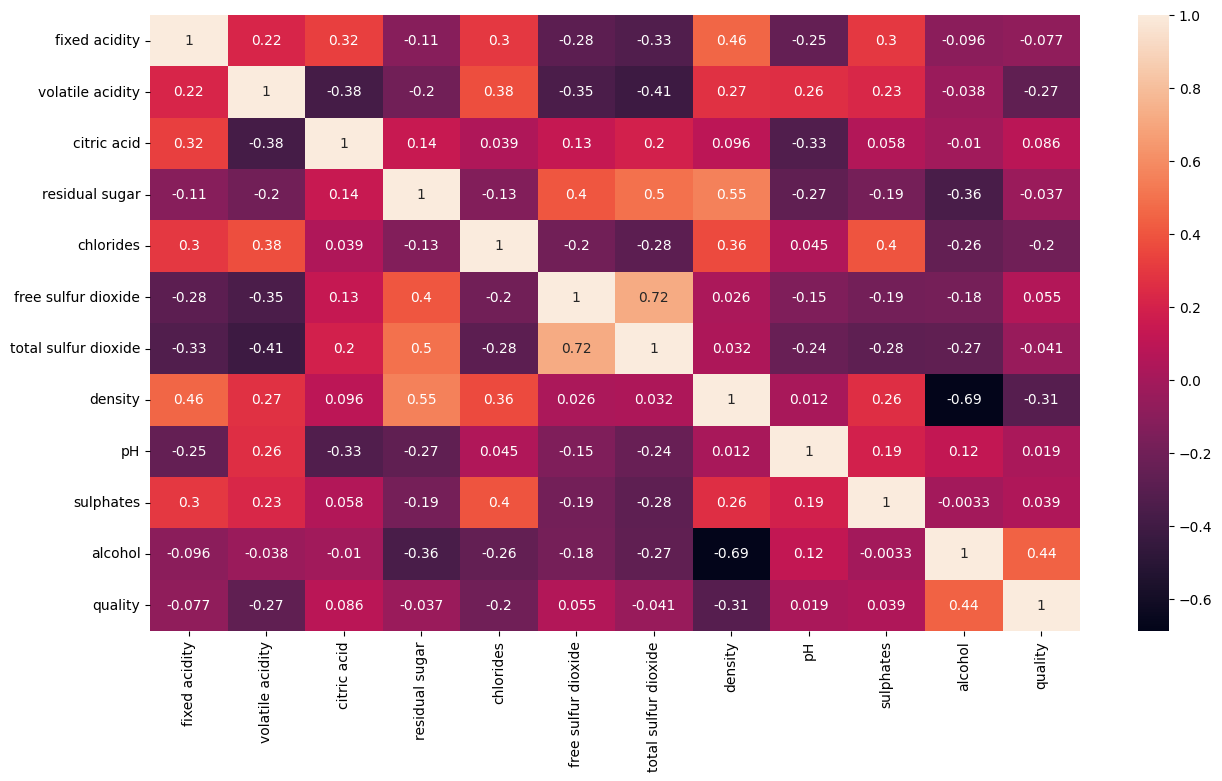

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

In [7]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

X.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
dtype: int64

In [8]:
# removing null values
X['fixed acidity'].fillna(X['fixed acidity'].mean(),inplace=True)
X['volatile acidity'].fillna(X['volatile acidity'].mean(),inplace=True)
X['citric acid'].fillna(X['citric acid'].mean(),inplace=True)
X['residual sugar'].fillna(X['residual sugar'].mean(),inplace=True)
X['chlorides'].fillna(X['chlorides'].mean(),inplace=True)
X['pH'].fillna(X['pH'].mean(),inplace=True)
X['sulphates'].fillna(X['sulphates'].mean(),inplace=True)
X.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

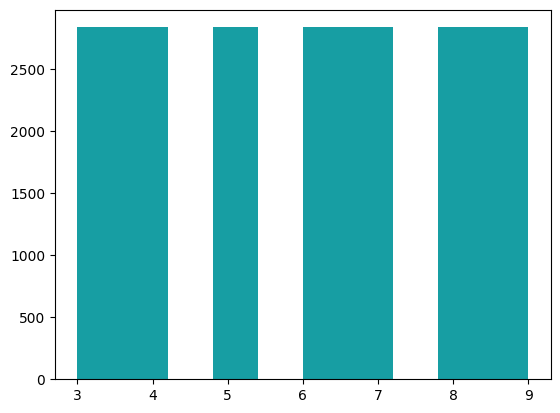

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [9]:
from imblearn.over_sampling import RandomOverSampler
xr,yr=RandomOverSampler().fit_resample(X,y)
plt.hist(yr,color='#179EA3')
plt.show()
yr.value_counts()

In [10]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(xr,yr,test_size=0.2,random_state=69)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
knc.fit(xtrain,ytrain)
ypred=knc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       0.98      1.00      0.99       564
           4       0.84      1.00      0.91       561
           5       0.58      0.55      0.57       542
           6       0.49      0.35      0.41       575
           7       0.70      0.72      0.71       571
           8       0.91      1.00      0.95       602
           9       0.99      1.00      0.99       556

    accuracy                           0.80      3971
   macro avg       0.78      0.80      0.79      3971
weighted avg       0.79      0.80      0.79      3971



In [14]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred=dtc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       564
           4       0.96      1.00      0.98       561
           5       0.76      0.77      0.76       542
           6       0.76      0.62      0.68       575
           7       0.86      0.94      0.90       571
           8       0.97      1.00      0.98       602
           9       1.00      1.00      1.00       556

    accuracy                           0.91      3971
   macro avg       0.90      0.90      0.90      3971
weighted avg       0.90      0.91      0.90      3971



In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(xtrain,ytrain)
ypred=rfc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       564
           4       0.99      1.00      0.99       561
           5       0.79      0.82      0.81       542
           6       0.77      0.71      0.74       575
           7       0.90      0.93      0.92       571
           8       1.00      1.00      1.00       602
           9       1.00      1.00      1.00       556

    accuracy                           0.92      3971
   macro avg       0.92      0.92      0.92      3971
weighted avg       0.92      0.92      0.92      3971

